In [32]:
import math

import numba
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Project code
from bayesian_optimizer import BayesianOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Optimize a 1D Test function:

Optima: x=0.900, y=0.810


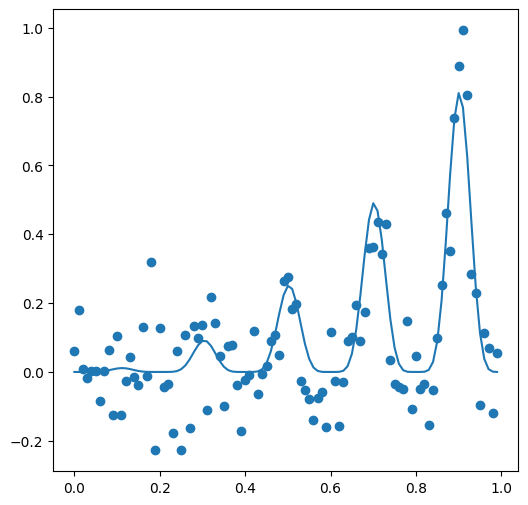

+--------+-------------------------+----------------------+
|   N    |           COST          |          x0          |
+--------+-------------------------+----------------------+
| init 1 |   0.17032201476681946   | 0.15315317536606488  |
| init 2 |   0.012775845769926394  | 0.04440900399998238  |
| init 3 |   -0.4885295838989565   |  0.9297841285522799  |
| init 4 |   -0.22916632214466476  |  0.1977465607656156  |
| init 5 |   -0.06441982485008653  |  0.5970931597523762  |
|   1    |    0.1436626346360337   |  0.7906140911494813  |
|   2    |   -0.5174042073680039   |  0.7111726358271228  |
|   3    |   -0.04150079685561506  | 0.08287152710218725  |
|   4    |   0.10443511018328354   |  0.534341757908198   |
|   5    |   0.08148005629180781   | 0.38304817029039595  |
|   6    |   -0.46086944351437376  |  0.8768264588187623  |
|   7    |   0.16810163976628228   |  0.7659944767919998  |
|   8    |   -0.24946409274946144  |  0.8669817714588054  |
|   9    |   -0.18648562947653122  |  0.

In [34]:
@numba.jit
def test_function(x, sigma=0.1):
    # Add some noise to make this function hard to optimize
    noise = np.random.normal(loc=0, scale=sigma)
    return (x**2 * math.sin(5 * math.pi * x)**6.0) + noise

# grid-based sample of the domain [0,1]
X = np.arange(0, 1, 0.01)
# sample the domain without noise
y = [test_function(x, 0) for x in X]
# sample the domain with noise
ynoise = [test_function(x) for x in X]
# find best result
ix = np.argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))
fig = plt.figure(figsize=(6, 6))
# plot the points with noise
plt.scatter(X, ynoise)
# plot the points without noise
plt.plot(X, y)
# show the plot
plt.show()

bounds = [(0, 1)]
optimizer = BayesianOptimizer(
    lambda x1: test_function(x1), 40, 5, bounds, 1, 5)
optimal = optimizer.maximize()
optimizer.print_results()



## Optimize the Branin Hoo Function

In [ ]:
@numba.jit
def branin_hoo_function(x1, x2):
    # SEE: https://statisticaloddsandends.wordpress.com/2019/06/24/test-functions-for-optimization-and-the-branin-hoo-function/
    a = 1
    b = 5.1 / (4 * math.pi**2)
    c = 5 / math.pi
    r = 6
    s = 10
    t = 1 / (8 * math.pi)
    return a * (x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*math.cos(x1) + s


In [ ]:
bounds = [(-5, 10), (0, 15)]
optimizer = BayesianOptimizer(
    lambda x1, x2: -1 * branin_hoo_function(x1, x2), 50, 5, bounds, 1, 20)
optimal = optimizer.maximize()
optimizer.print_results()
